Predict productive vs unproductive work-from-home days using features like meeting count, break frequency, and workspace setup. Use Decision Trees to identify factors that boost remote work effectiveness.

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('remote_work_productivity.csv')
df


,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,Remote,29,75,78
1,2,In-Office,45,49,47
2,3,Remote,34,74,89
3,4,Remote,25,81,84
4,5,Remote,50,70,74
...,...,...,...,...,...
995,996,Remote,33,88,82
996,997,Remote,33,88,73
997,998,In-Office,45,74,61
998,999,In-Office,57,50,52


In [54]:
df["Productive"] = (df["Productivity_Score"] > 70).astype(int)
df = pd.get_dummies(df, columns=["Employment_Type"], drop_first=True)
df["Overwork_Flag"] = (df["Hours_Worked_Per_Week"] > 40).astype(int)
df["Balance_Ratio"] = df["Well_Being_Score"] / (df["Hours_Worked_Per_Week"] + 1) 
df["Hours_WellBeing_Interaction"] = df["Hours_Worked_Per_Week"] * df["Well_Being_Score"]
df

,Employee_ID,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score,Productive,Employment_Type_Remote,Overwork_Flag,Balance_Ratio,Hours_WellBeing_Interaction
0,1,29,75,78,1,True,0,2.600000,2262
1,2,45,49,47,0,False,1,1.021739,2115
2,3,34,74,89,1,True,0,2.542857,3026
3,4,25,81,84,1,True,0,3.230769,2100
4,5,50,70,74,0,True,1,1.450980,3700
...,...,...,...,...,...,...,...,...,...
995,996,33,88,82,1,True,0,2.411765,2706
996,997,33,88,73,1,True,0,2.147059,2409
997,998,45,74,61,1,False,1,1.326087,2745
998,999,57,50,52,0,False,1,0.896552,2964


Decision Tree Accuracy: 0.6666666666666666


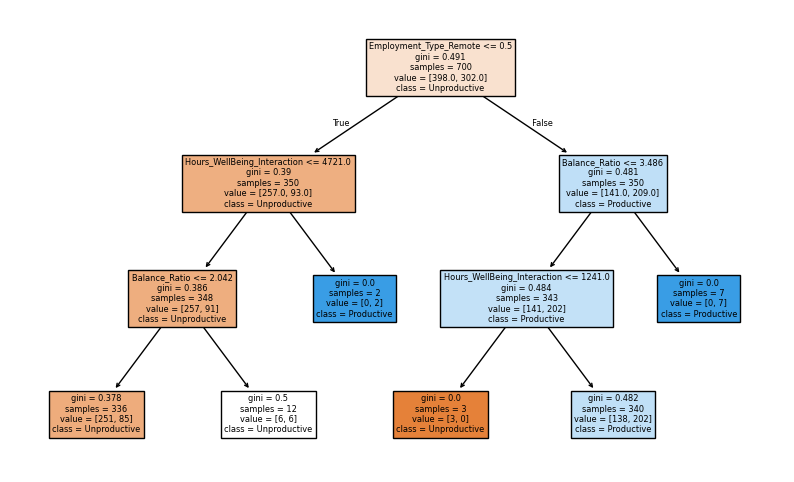

Feature Importances:
 Employment_Type_Remote         0.827740
Hours_WellBeing_Interaction    0.091900
Balance_Ratio                  0.080361
Hours_Worked_Per_Week          0.000000
Well_Being_Score               0.000000
Overwork_Flag                  0.000000
dtype: float64

Tree depth: 3
Number of leaves: 6


In [55]:
X = df.drop(["Employee_ID", "Productivity_Score", "Productive"], axis=1)
y = df["Productive"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

print("Decision Tree Accuracy:", clf.score(X_test, y_test))

plt.figure(figsize=(10,6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Unproductive","Productive"])
plt.show()

feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
print("Feature Importances:\n", feature_importance.sort_values(ascending=False))

print("\nTree depth:", clf.get_depth())
print("Number of leaves:", clf.get_n_leaves())

In [56]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

X = df.drop(["Employee_ID","Productive","Productivity_Score"], axis=1)
y = df["Productive"]

dt = DecisionTreeClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dt, X, y, cv=cv, scoring="accuracy")

print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.558


In [57]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid=params,
                    cv=cv,
                    scoring="accuracy",
                    n_jobs=-1)

grid.fit(X, y)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.6580000000000001


In [58]:
best_model = grid.best_estimator_
importances = pd.Series(best_model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))


Employment_Type_Remote         0.851685
Balance_Ratio                  0.050694
Well_Being_Score               0.040074
Hours_Worked_Per_Week          0.029764
Hours_WellBeing_Interaction    0.027784
Overwork_Flag                  0.000000
dtype: float64
